# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import functools
import seaborn.objects as so
import collections

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int,r:float):
        self.n = n
        self.r = r
        self.points = np.random.default_rng().random((n,2))
    
    @functools.cached_property
    def distances(self):
        return np.array([np.sqrt(np.sum((x- self.points)**2, axis=1)) for x in self.points])

    @functools.cached_property
    def adj(self):
        mask = self.distances < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}
    
    def n_comp(self):
        def dfs(gr,s):
            for v in gr[s]:
                if v not in self.parent:
                    self.parent[v]=s
                    dfs(gr,v)
        self.parent = {}
        res = 0
        for i in range(self.n):
            if i not in self.parent:
                res+=1
                self.parent[i]=None
                dfs(self.adj,i)
        return res

    def degree_distribution(self):
        dgr=collections.Counter([len(v) for _,v in self.adj.items()])
        return np.array(list(dgr.items()))

In [ ]:
rgg = RGG(100,0.1)

In [ ]:
rgg.adj

{0: [82],
 1: [4, 32, 40, 56, 61, 62, 65],
 2: [50, 63, 72],
 3: [76, 87],
 4: [1, 30, 40, 69],
 5: [7, 14, 52, 92],
 6: [49],
 7: [5, 14, 36, 52, 78, 92],
 8: [47, 56, 61],
 9: [26],
 10: [60, 93],
 11: [16, 33, 44, 55],
 12: [75],
 13: [],
 14: [5, 7, 36, 42, 52, 53, 78, 92],
 15: [22, 76, 87],
 16: [11, 33, 44],
 17: [28, 43, 96],
 18: [27, 44],
 19: [20, 38, 39, 94],
 20: [19, 29, 38, 39, 94],
 21: [96],
 22: [15, 76, 87],
 23: [71, 79],
 24: [],
 25: [39, 68, 83, 94],
 26: [9, 36],
 27: [18, 44, 50, 72],
 28: [17, 43, 96],
 29: [20, 45, 68],
 30: [4, 69, 73],
 31: [46, 49],
 32: [1, 62, 64, 65, 67, 89, 95],
 33: [11, 16, 44],
 34: [],
 35: [93],
 36: [7, 14, 26, 42, 92],
 37: [41, 77, 99],
 38: [19, 20, 74],
 39: [19, 20, 25, 83, 94],
 40: [1, 4],
 41: [37, 77, 99],
 42: [14, 36, 52, 78, 92],
 43: [17, 28, 54],
 44: [11, 16, 18, 27, 33],
 45: [29, 68, 83, 90],
 46: [31],
 47: [8, 51, 98],
 48: [99],
 49: [6, 31],
 50: [2, 27, 72],
 51: [47, 58, 98],
 52: [5, 7, 14, 42, 53, 59, 78,

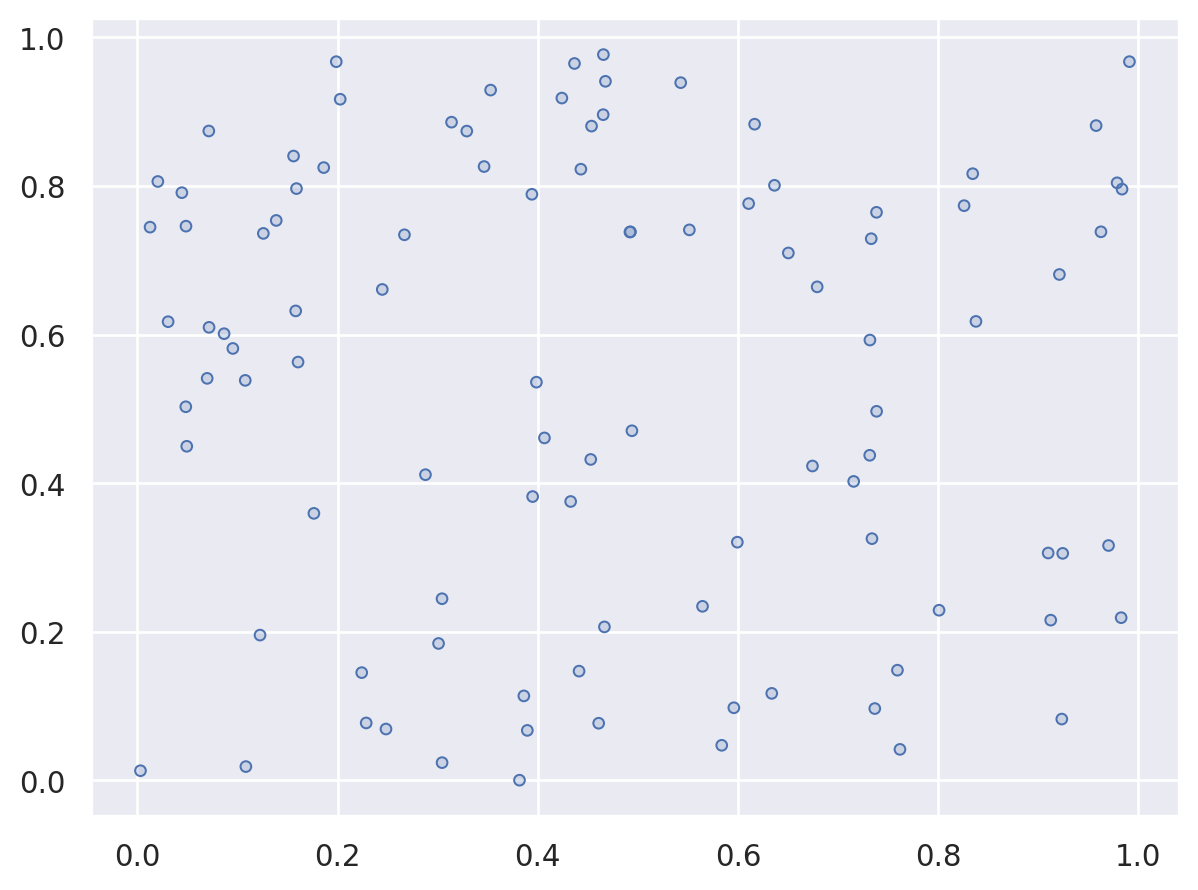

In [ ]:
p = so.Plot(x=rgg.points[:,0], y=rgg.points[:,1])
p.add(so.Dots())

In [ ]:
rgg.n_comp()

17

In [ ]:
d_np = rgg.degree_distribution()
d_np

array([[ 1, 13],
       [ 7,  4],
       [ 3, 29],
       [ 2, 16],
       [ 4, 15],
       [ 6,  6],
       [ 0,  7],
       [ 8,  2],
       [ 5,  8]])

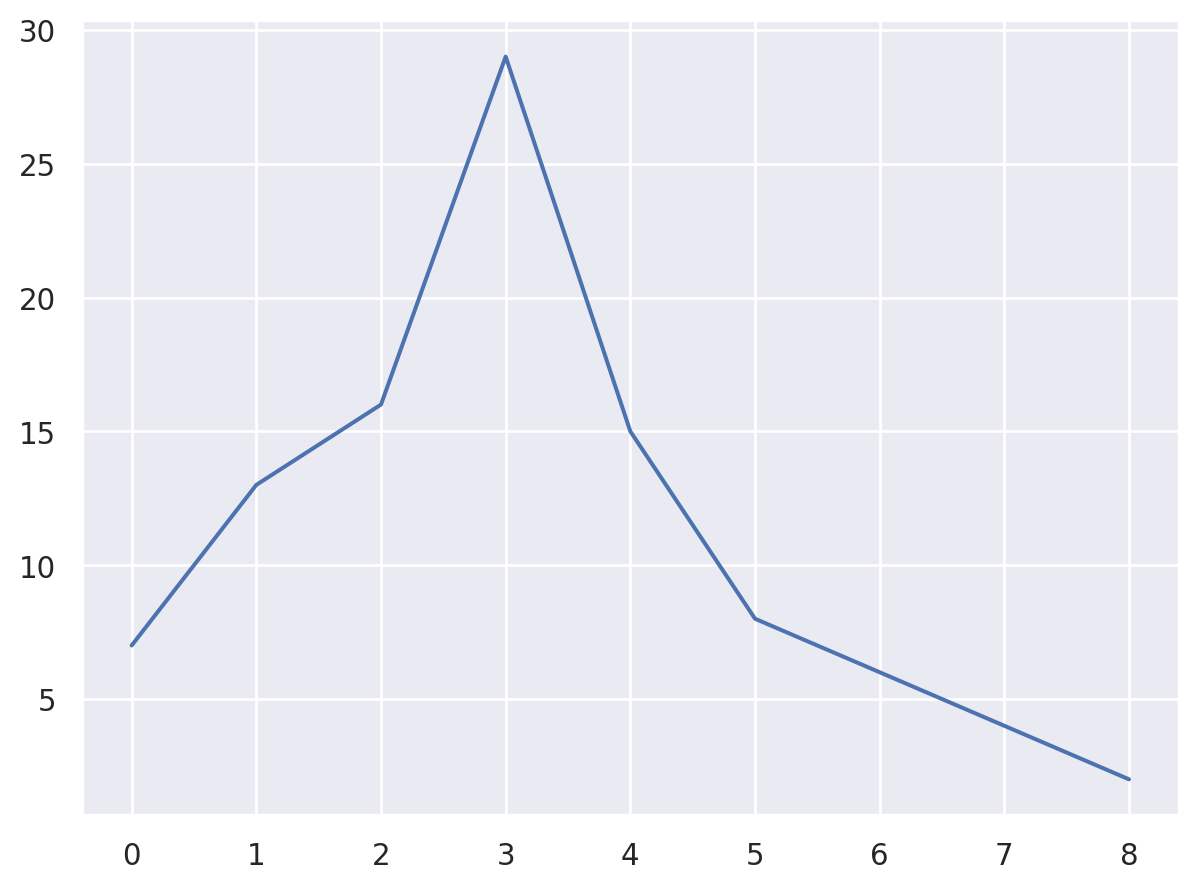

In [ ]:
(
    so.Plot(x=d_np[:,0], y=d_np[:,1])
    .add(so.Line())
)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()